<a href="https://colab.research.google.com/github/IDCE-MSGIS/lab-5-airport-historgram-data-annabebbington/blob/main/Bebbington_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Anna Bebbington
Created: 11/13/2020
Lab 5: Analysing Airport Data
Inputs for this script are the airport and routes csvs from OpenFlights Project. 
The outputs created by this script are the airports located in the UK (Challenge 1), a dictionary of airport IDs and Latitudes and a dictionary of airport IDs and Longitudes (Challenge 2), a list of the distances of all the flight routes in the routes csv (Challenge 3), and a historgram of the flight distances (Challenge 4).
'''

In [1]:
# Upload airports and Routes Data files
from google.colab import files 
uploaded = files.upload()

# Upload routes dataset
from google.colab import files 
uploaded = files.upload()

Saving airports.dat to airports.dat


Saving routes.dat to routes.dat


In [ ]:
# Challenge 1 - Print airport names for a specific country 

# import airports data 
import csv 
airports = open ("airports.dat")

# create for loop to iterate through airports csv
for row in csv.reader(airports):
  if row[3]=='United Kingdom': # find rows where the 4th column (country) is the United Kingdom
    print(row[1]) # print airports that meet this criteria

In [ ]:
# Challenge 2 - Build a dictionary mapping unique airport ID to geographical coordinates

# Create empty lists for ID, Lat and Lon
ListID = []
ListLat= []
ListLon = []

# Import csv
import csv 
airports = open ("airports.dat")

# for loop to iterate through csv rows and add ID, Lat and Lon to 3 different lists
for row in csv.reader(airports):
  if row[0] not in ListID:
    ListID.append(row[0])
  if row[0] not in ListLat:
    ListLat.append(row[6])
  if row[0] not in ListLon:
    ListLon.append(row[7])

# Check Lists
print(ListID)
print(ListLat)
print(ListLon)

# Zip ID and Lat/Long Lists to create 2 dictionaries
# Dictionary with airport ID and Latitudes 
DictLat = dict(zip(ListID, ListLat))
print(DictLat)
# Dictionary with airport ID and Longitudes
DictLon = dict(zip(ListID, ListLon))
print(DictLon)

# Check that dictionary pairings are correct
print(DictLat["2900"]) 
print(DictLon["2900"])







In [ ]:
# Challenge 3 - Calculate the length of routes, create a new list 

# First upload the geo_distance.py file to Colab 
from google.colab import files
uploaded = files.upload()

# import geodistance library
import geo_distance

#Then run your check (answer should be 15973.237754707652)
geo_distance.distance(-37.814,144.963,52.519,13.406) # Melbourne to Berlin in km!

distances = [] # create an empty list for flight distances 

routes = open("routes.dat") # import routes data 

# Create for loop to iterate through routes data, find lat/long values, and populate geo_distance() function
for row in csv.reader(routes):
  source_airport = row[3] # define source airport as 4th column in routes data
  dest_airport = row[5] # define destination airport as 6th column in routes data
  if source_airport in DictLat and dest_airport in DictLat: # choose only route rows that are in DictLat and DictLon
    source_lat = DictLat[source_airport] # define source latitude using value from DictLat
    source_lon = DictLon[source_airport] # define source longitude using value from DictLon
    dest_lat = DictLat[dest_airport] # define destination latitude using value from DictLat
    dest_lon = DictLon[dest_airport] # define destination longitude using value from DictLon
    distances.append(geo_distance.distance(float(source_lat), float(source_lon), float(dest_lat), float(dest_lon))) # add values output by the geo_distance function to the distances list. All inputs in the geo_distance function need to be converted to floats. 

# print to check distances list 
print(distances) 

Text(0.5, 1.0, 'Flight Distance Frequency')

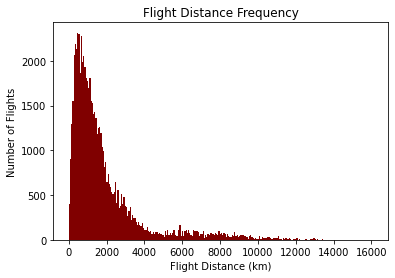

In [52]:
# Challenge 4 - Plot a histogram based on route lengths

# import numpy library and matplotlib.pyplot 
import numpy as np
import matplotlib.pyplot as plt

# create histrogram using distances list, add histogram features  
plt.hist(distances, 250, color='maroon') # using distances list, 250 bins, choosing color. 
plt.xlabel('Flight Distance (km)')
plt.ylabel('Number of Flights')
plt.title('Flight Distance Frequency')